## Exploratory Data Analysis and Hypothesis Testing on Titanic Dataset

### About Dataset



The data consists of demographic and traveling information for 891 of the Titanic passengers, and the goal is to predict the survival of these passengers.

The Titanic dataset is also the subject of the introductory competition on Kaggle.com.


**INDEX**

* Import Libraries
* Data Overview
* Data Analysing
* Data Cleaning
* Converting Categorical Features
* Numeric Data
* Numeric Data Analysis
* Hypothesis Testing









## 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from scipy import stats as st

## 2) Data Overview

The titanic data set has 891 rows and 12 columns. Summary of Datatypes in datasets are 

* 2 float64
* 5 int64
* 5 object

Dependent/Target feature choosen is __Survived__ which is integer type.

Columns and their respective datatypes are given below:

1) PassengerId    ->    int64  

2) Survived       ->    int64

3) Pclass         ->    int64  

4) Name           ->    object 

5) Sex            ->    object 

6) Age            ->    float64

7) SibSp          ->    int64  

8) Parch          ->    int64  

9) Ticket         ->    object 

10) Fare          ->    float64

11) Cabin         ->    object 

12) Embarked      ->    object



In __Age__ , __Embarked__, __Cabin__ features there are some values missing. 

* 177 values from __Age__ column is missing
* 687 values from __Cabin__ column is missing 
* 2 values from __Embarked__ column is missing


In [2]:
df=pd.read_csv(r'C:\Users\APOORVA\Desktop\MACHINE LEARNING\Recording\19\train (1).csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print('Number of Rows:' , df.shape[0])
print('Number of Columns', df.shape[1])

Number of Rows: 891
Number of Columns 12


The Titanic data has 891 rows and 12 columns. 

 ### Checking for Missing Values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().apply(pd.value_counts).T

,False,True
PassengerId,891.0,NaN
Survived,891.0,NaN
Pclass,891.0,NaN
Name,891.0,NaN
Sex,891.0,NaN
Age,714.0,177.0
SibSp,891.0,NaN
Parch,891.0,NaN
Ticket,891.0,NaN
Fare,891.0,NaN


<AxesSubplot:>

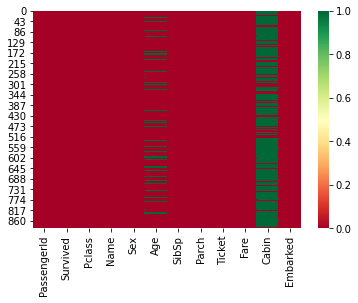

In [8]:
## We can also visualize missing data using seaborn

sns.heatmap(df.isnull(),cmap='RdYlGn')

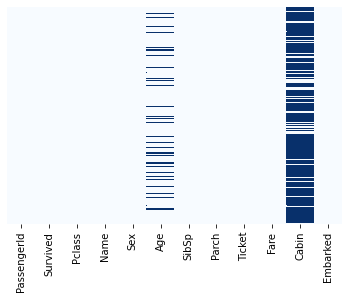

In [9]:
#deleting cbar and yticklabels and using different color
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

######  Approximately 20% of Age data is missing and 77% of cabin data is missing.

## 3) Data Analysing


This section discusses how some features are related to target feature.

Here, I have plotted to show how many passengers survived in the titanic incident.

There are 2 plots that shows how **Gender** and **Socio-economic class** affects the **survival** chances.

Some additional plotting like **Age**, **Fare** is plotted to check whether it is normally distributed or not, which wiil be later used in hypothesis testing.

#### Univariant Analysis

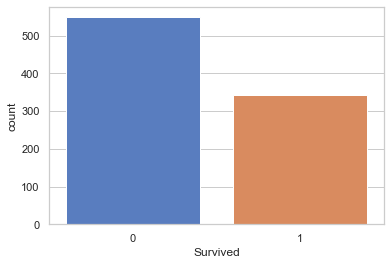

In [10]:
sns.set(style='whitegrid',palette='muted',color_codes=True)
sns.countplot(df.Survived)
plt.show()

##### Most of the people died in the Titanic Tragedy , only around 300 people survived.

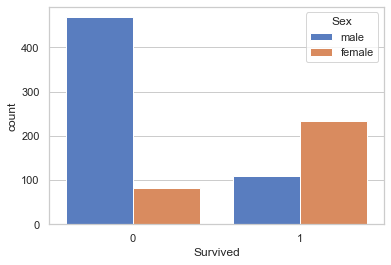

In [11]:
sns.countplot(df.Survived,hue=df.Sex)
plt.show()

##### There were more males than females aboard the ship, roughly double the amount. More males died in Titanic Tragedy than females 

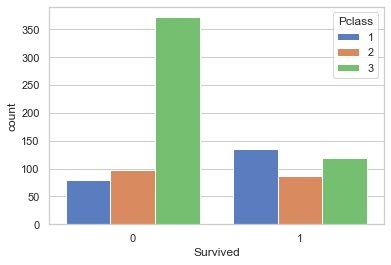

In [12]:
sns.countplot(df.Survived,hue=df.Pclass)
plt.show()

##### The majority of the people traveling, had tickets to the 3rd class.

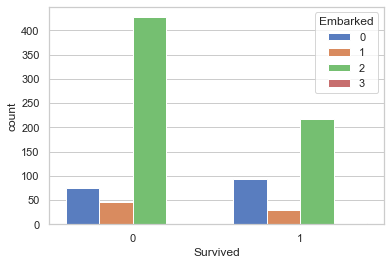

In [56]:
sns.countplot(df.Survived,hue=df.Embarked)
plt.show()

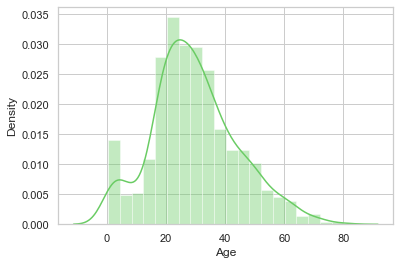

In [13]:
sns.distplot(df.Age,hist=True,kde=True,color='g')
plt.show()

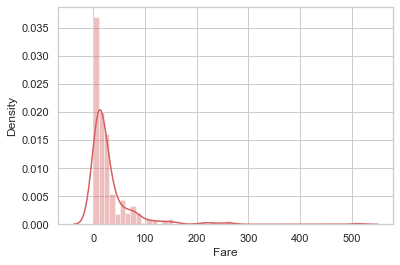

In [14]:
sns.distplot(df.Fare,hist=True,kde=True,color='r')
plt.show()

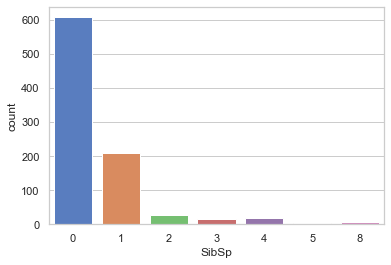

In [15]:
sns.countplot(df.SibSp)
plt.show()

## 3) Data Cleaning

We have to fill the missing data in Age Feature. Traditionally we fill calculating mean of all passengers ages (imputation) or We can check average age by passenger class

Median is taken from boxplot and filled in function


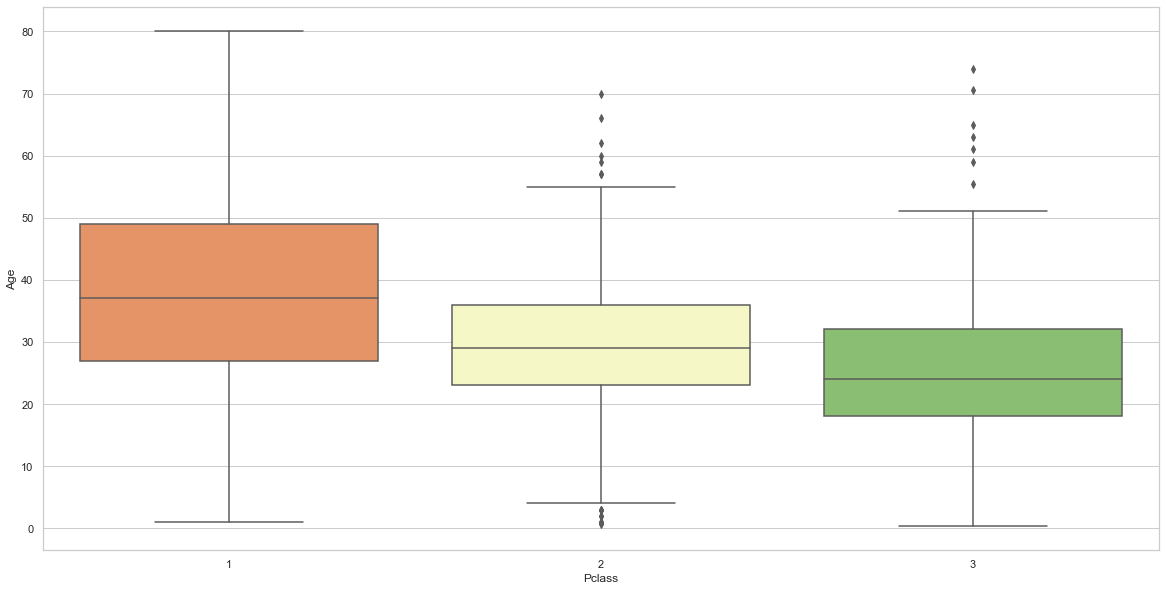

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass',y='Age',data=df,palette='RdYlGn')
plt.show()

##### 1st class = age group is approximately 27 to 49 and 2nd class 23 to 36 and 3rd class 18 to 33

In [17]:
def filling_age(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [18]:
# Can also use this traditional method
#df['Age'].fillna (df['Age'].mean(),inplace=True)

In [19]:
df['Age']=df[['Age','Pclass']].apply(filling_age,axis=1)

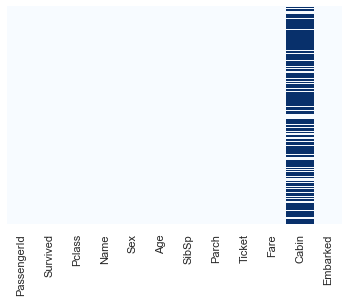

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

In Cabin feature, we have a lot of missing (i.e 687 out of 891). So we will drop that column. However, this feature does not help in predicting target. 

## 4) Converting Cateogorical Features

Features such ‘Sex’ , ‘Embarked’  is encoded using Label Encoder

Remove Name, Ticket and Cabin feature as they are not useful for prediction

In [21]:
le=LabelEncoder()

In [22]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
df['Sex']=le.fit_transform(df['Sex'])

In [24]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [25]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [28]:
df['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

Here we have to drop certain features that are not useful in predicting the target. 

In [29]:
df=df.drop(['Name','Ticket','Cabin'],axis=1)

# 5) Numeric Data

* Remove the features ‘PassengerId’, 'SibSp','Parch’ which are of no use.

* Now we have 891 rows and 6 columns. The column size is reduce from 12 to 6.
 
* Plot the Pairplot to check skewness and outliers.

* We have already seen in **Data Analysing** Section that **Fare** is not normally distributed it is right skewed. Now, **Log transformation** is applied to make it normally distributed.

* Now for hypothesis testing, we want to see whether socio-economic class affects survival rate. For that we have to first confirm whether passenger travelling with first class ticket (Pclass 1) were rich or not. 

* For analysing , we take original fare feature and calculate mean to draw infer.

* Infer
* The First class ticket has mean of 84.15 USD which is much lower than mean of third class ticket. Hence, we can assume that people travelling with first class ticket were rich.

* Then , First Class passenger vs Survival Rate is plotted.

* We can see in the plot that First Class passengers had Higher Survival Rate than third Class passengers.

* Hence, Hypothesis test is conducted to check whether the survival rate was affected by socio-economic class of passengers.


In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [31]:
df=df.drop(['PassengerId','SibSp','Parch'],axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2
887,1,1,0,19.0,30.0000,2
888,0,3,0,24.0,23.4500,2
889,1,1,1,26.0,30.0000,0


In [32]:
df.shape

(891, 6)

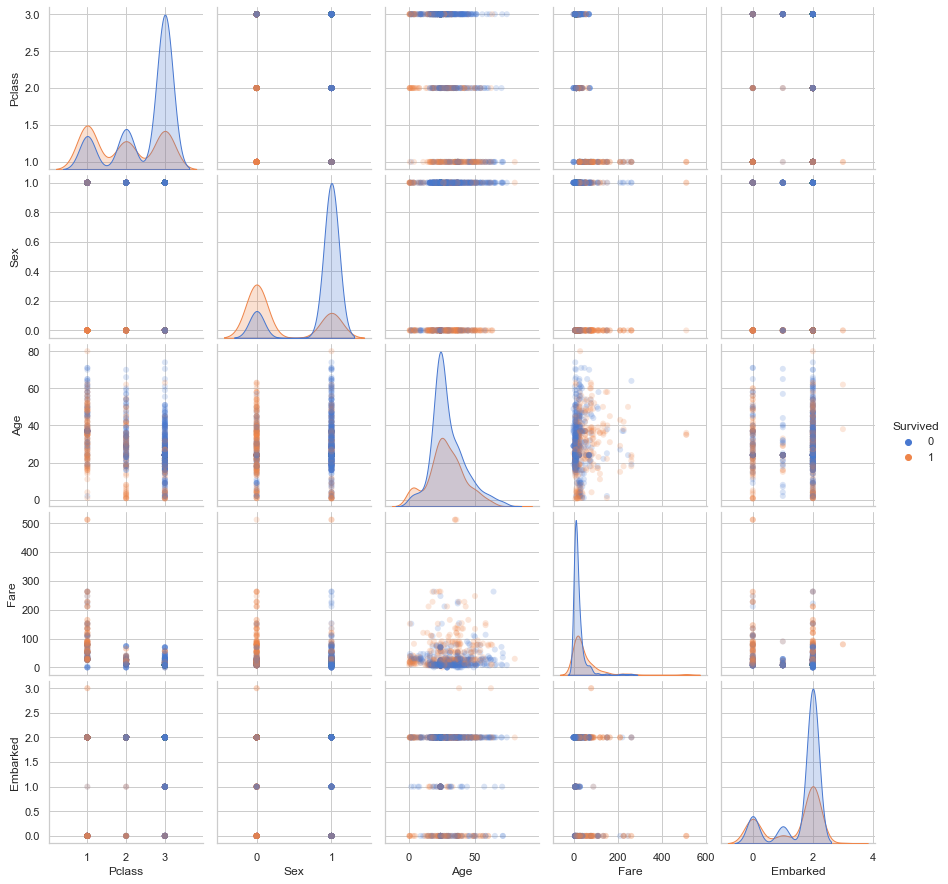

In [33]:
sns.pairplot(df,hue='Survived',plot_kws=dict(alpha=0.2,edgecolor='none'))

In [34]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.548256
Fare        4.787317
Embarked   -1.246689
dtype: float64

Fare is highy skewed

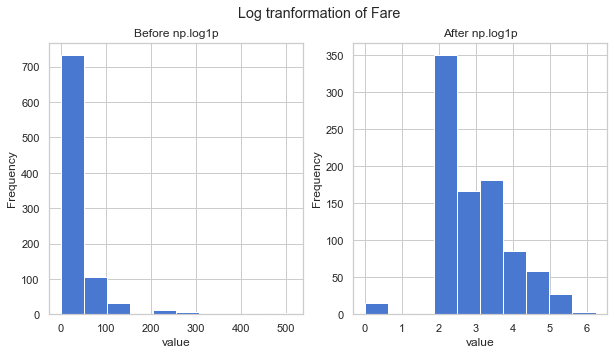

In [35]:
fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(10,5))
df['Fare'].hist(ax=ax_before)
df['Fare'].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='Before np.log1p',ylabel='Frequency',xlabel='value')
ax_after.set(title='After np.log1p',ylabel='Frequency',xlabel='value')
fig.suptitle('Log tranformation of Fare')
plt.show()

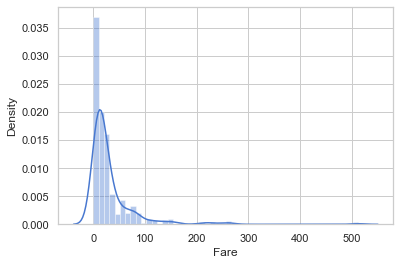

In [36]:
sns.distplot(df.Fare,hist=True,kde=True,color='b')
plt.show()

In [37]:
df['Fare1'] = df['Fare'].apply(np.log1p)

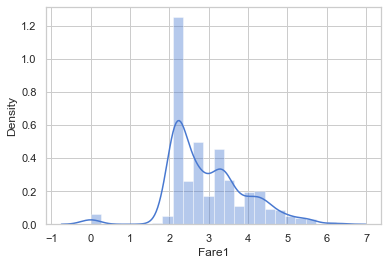

In [38]:
sns.distplot(df.Fare1,hist=True,kde=True,color='b')
plt.show()

In [39]:
first_fares=df['Fare'][df['Pclass']==1]
third_fares =df["Fare"][df["Pclass"]==3]

In [40]:
first_class_fare=pd.DataFrame(first_fares)

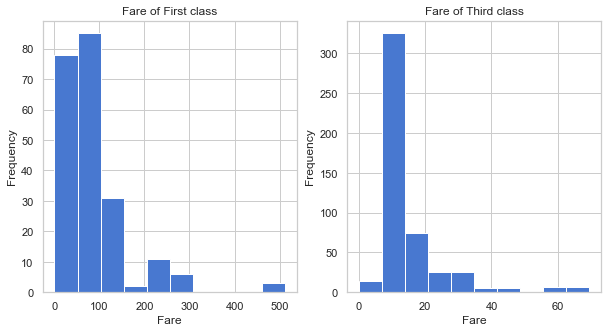

In [41]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(first_fares)
ax[0].set_title('Fare of First class')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Frequency')
ax[1].hist(third_fares)
ax[1].set_title('Fare of Third class')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Fare')
plt.show()

In [42]:
first_fares.mean(),first_fares.median()

(84.15468749999992, 60.287499999999994)

In [43]:
third_fares.mean(),third_fares.median()

(13.675550101832997, 8.05)

The First class ticket has mean of 84.15 USD which is much lower than mean of third class ticket. Hence, we can assume that people travelling with first class ticket were rich.

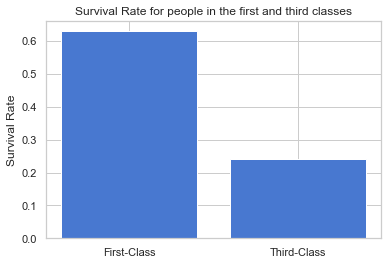

In [44]:
x = ["First-Class", "Third-Class"]
y = [np.mean(df["Survived"][df["Pclass"]==1]), np.mean(df["Survived"][df["Pclass"]==3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

We can see in the above plot that First Class passengers had Higher Survival Rate than third Class passengers

## Hypothesis Formulation and Testing

**Hypothesis 1: In general, socio-economic status of the passenger did not affect their survival rate 

Null Hypothesis(H0): The socio-economic class of the people didn’t have an effect on the survival rate.

Alternative Hypothesis(Ha): The socio-economic class of the people affected their survival rate.

**Hypothesis 2: Males Survival rate is low

**Hypothesis 3: Passengers embarked from Southampton had low Survival rate.

Hypothesis Testing is done for the Hypothesis 1:

* Z test is conducted.
* Here a sample of 100 mean is taken for each population. 
* Significance level is 0.01.
* Z score is calculated and 28.16 is obtained
* P value(Two tailed test ) is 1.6027274360886918e-174 is obtained 





In [45]:
First_Class_Sample = np.array([np.mean(df[df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
Third_Class_Sample = np.array([np.mean(df[df["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

Here a sample of 100 mean is taken for each population as above

In [46]:
First_Class_Sample.mean()

0.6335

In [47]:
Third_Class_Sample.mean()


0.23850000000000002

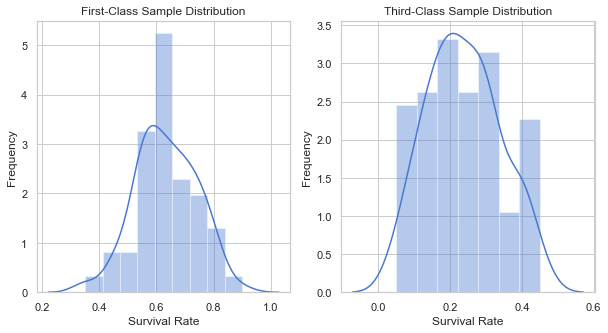

In [48]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(Third_Class_Sample)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

### Significance Level = 0.01

Standard Deviation of first class sample

In [49]:
sd1=First_Class_Sample.std()
sd1

0.1070175219298223

Standard Deviation of third class sample

In [50]:
sd2=Third_Class_Sample.std()
sd2

0.10095915015490177

Difference between 2 mean value

In [51]:
mean_of_2=First_Class_Sample.mean()-Third_Class_Sample.mean()
mean_of_2

0.3949999999999999

In [52]:
sigma_difference = np.sqrt((sd1**2)/len(First_Class_Sample)  +  (sd2**2)/len(Third_Class_Sample))

#### Z Score

In [53]:
z_score=mean_of_2/sigma_difference
z_score

26.848083169707017

#### P value

In [54]:
st.norm.sf(abs(z_score))*2

8.880665792387466e-159

P value is very low when compared to significance level. Hence Null Hypothesis is rejected

## Conclusion: 

**P value is obtained is much lower to our significance level so we can comfortably reject our Null Hypothesis. The provided sample proves that there is correlation between socio-economic status and survival rate. Hence there was more chance for rich passenger to survive in the titanic tragedy.**

### Future Analysis

Logistic Regression algorithm can be applied on the model to predict target variable and evaluated.